## RNA Velocity Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import rc_context
import scanpy as sc
import os
import math
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap 
import seaborn as sns
from pathlib import Path
%matplotlib inline
import scvelo as scv

In [2]:
sc.settings.set_figure_params(dpi=100, dpi_save=300, figsize=(5, 5))
plt.set_cmap('viridis')
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

<Figure size 500x500 with 0 Axes>

In [8]:
adata=sc.read_h5ad('PlasmaType.h5ad')

In [9]:
PATH='/disk222/fuwy/mine/je/main/velocyto/'
ap={}
al={}
sample=['SS_JE','JH_JE','DUR_JE']

for i in sample:
    ap[f'{i}']=sc.read_loom(PATH+f'{i}'+'.loom',sparse=True)
    ap[f'{i}'].var_names_make_unique
    if i=='JH_JE':
        length=len(f'{i}')+2
    else:
        length=len(f'{i}')+1
    ap[f'{i}'].obs.index=ap[f'{i}'].obs.index.str[length:-1]
    x=['{}','1']
    ap[f'{i}'].obs.index=ap[f'{i}'].obs.index.map('-'.join(x).format)
    y=['{}',f'{i}']
    ap[f'{i}'].obs.index=ap[f'{i}'].obs.index.map('_'.join(y).format)
    if(ap[f'{i}'].obs.shape[1]!=0):
        ap[f'{i}'].obs=ap[f'{i}'].obs.drop(columns=['Clusters','_X', '_Y'])
    al[f'{i}']=scv.utils.merge(adata[adata.obs['PROJECT'].isin([f'{i}'])], ap[f'{i}'])

In [10]:
adata[adata.obs['BATCH'].isin(['SS_JE'])].obs.index

Index(['AAACCCAGTCACGACC-1_SS_JE', 'AAACCCATCTGTACAG-1_SS_JE',
       'AAACGAAAGTAGGAAG-1_SS_JE', 'AAACGAAGTTCCTACC-1_SS_JE',
       'AAACGCTCACCTTCGT-1_SS_JE', 'AAAGAACCACGACCTG-1_SS_JE',
       'AAAGAACCATCACCAA-1_SS_JE', 'AAAGGATGTATTGACC-1_SS_JE',
       'AAAGGGCCATGTACGT-1_SS_JE', 'AAAGGGCTCAGCGCAC-1_SS_JE',
       ...
       'TTTACGTTCACTTTGT-1_SS_JE', 'TTTACTGTCGCTTAAG-1_SS_JE',
       'TTTATGCGTCCTGTTC-1_SS_JE', 'TTTCAGTGTGAGCCAA-1_SS_JE',
       'TTTCGATAGCTAAGTA-1_SS_JE', 'TTTGGAGAGAGTGGCT-1_SS_JE',
       'TTTGGAGCAAGGCTTT-1_SS_JE', 'TTTGGTTTCGAACACT-1_SS_JE',
       'TTTGTTGAGATGCTAA-1_SS_JE', 'TTTGTTGAGCCGGAAT-1_SS_JE'],
      dtype='object', length=734)

In [19]:
ap['SS_JE'].obs.index

Index(['AAAGGGCTCAGCGCAC-1_SS_JE', 'AAAGGGCGTCATCGGC-1_SS_JE',
       'AAAGTCCTCCTCTGCA-1_SS_JE', 'AAAGTGACAAAGGTTA-1_SS_JE',
       'AAACCCATCACTTGGA-1_SS_JE', 'AAAGTGAAGCGGGTTA-1_SS_JE',
       'AAAGGATTCAGCACCG-1_SS_JE', 'AAACCCAGTCCTGTTC-1_SS_JE',
       'AAACCCAGTCGCACGT-1_SS_JE', 'AAAGAACCATGACTGT-1_SS_JE',
       ...
       'TTTGGTTTCAAGAATG-1_SS_JE', 'TTTGTTGAGATGCTAA-1_SS_JE',
       'TTTGTTGTCTTTCTAG-1_SS_JE', 'TTTGTTGTCCGATCTC-1_SS_JE',
       'TTTGTTGGTTTCAGAC-1_SS_JE', 'TTTGGTTTCGAACACT-1_SS_JE',
       'TTTGTTGAGATGACAT-1_SS_JE', 'TTTGTTGCAGAGATTA-1_SS_JE',
       'TTTGGTTGTCGTATGT-1_SS_JE', 'TTTGTTGGTTTCACTT-1_SS_JE'],
      dtype='object', name='CellID', length=12220)

In [11]:
ldata=sc.concat(ap.values(),keys=ap.keys(),label='loom')
adata=scv.utils.merge(adata, ldata)

In [12]:
scv.pp.moments(adata)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [13]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [ ]:
scv.tl.velocity_graph(adata)

AttributeError: can't set attribute

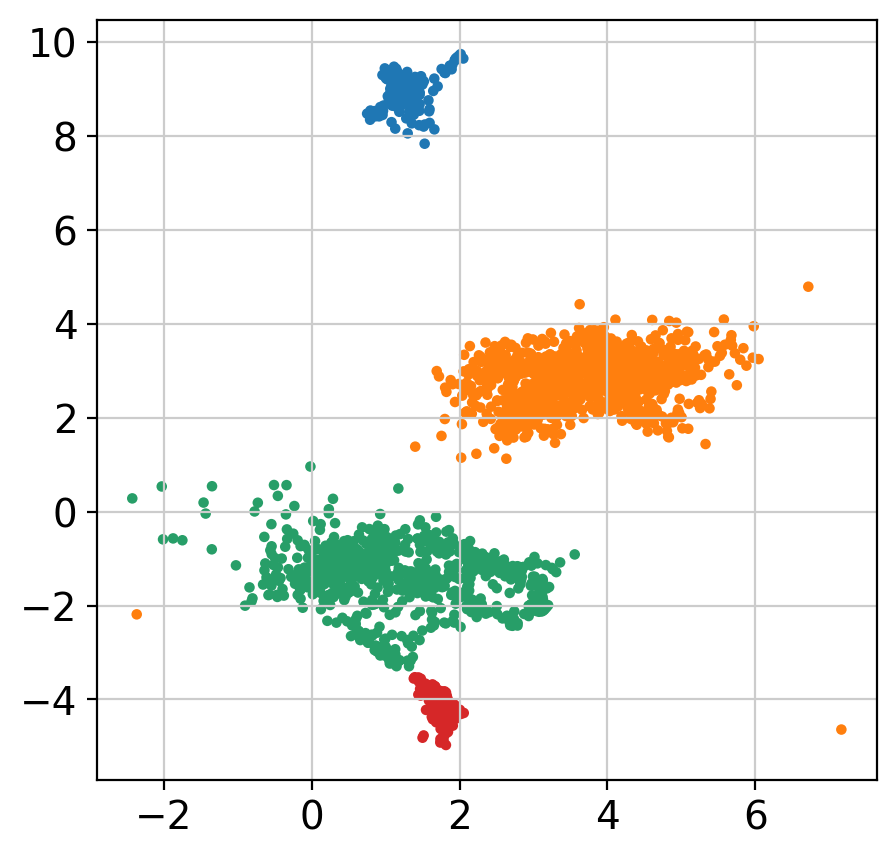

In [15]:
scv.pl.scatter(adata, basis="umap", color="PlasmaType")

AttributeError: can't set attribute

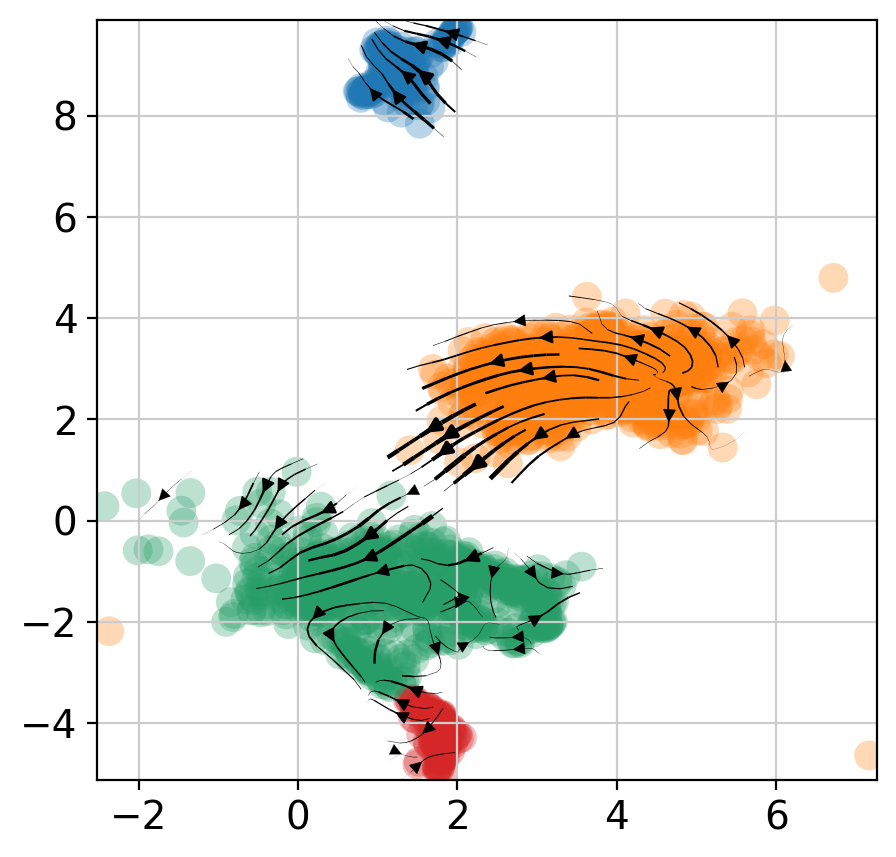

In [17]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color="PlasmaType",save='_RNA.pdf') #流线型